2121728/2110848 [==============================] - 0s 0us/step
46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 4, 2, 2, 9, 697, 2, 111, 8, 25, 109, 29, 2, 11, 150, 244, 364, 33, 30, 30, 2, 333, 6, 2, 159, 9, 2, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 2, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 2, 966, 2, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 2, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 2, 855, 129, 783, 21, 4, 2, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 2, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]
Epoch 1/20
90/90 [==============================] - 30s 285ms/step - loss: 2.5777 - accuracy: 0.3497 - val_loss: 2.1698 - val_accuracy: 0.4488
Epoch 2/20
90/90 [==============================] - 20s 221ms/step - loss: 2.0361 - accuracy: 0.4905 - val_loss: 1.9283 - val_accuracy: 0.5093
Epoch 3/20
90/90 [==============

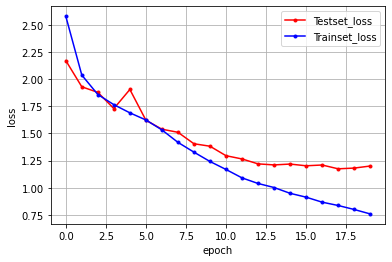

In [1]:
from keras.preprocessing import sequence
from keras.datasets import reuters
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding, LSTM

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt


# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)


# 불러온 데이터셋을 학습셋과 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)


# 데이터 확인 후 출력
category = numpy.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_test[0])


# 데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)


# 모델의 설정
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))


# 모델의 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))


# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))


# 테스트셋의 오차
y_vloss = history.history['val_loss']


# 학습셋의 오차
y_loss = history.history['loss']


# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')


# 그래프에 그리드를 추가하고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()